<a href="https://colab.research.google.com/github/aniketkv1998/Doodle_Classifier/blob/master/Doodle_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget --output-document utils1.py http://deeplearning.net/tutorial/code/utils.py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from utils1 import tile_raster_images
import json
import random

--2019-08-21 05:40:05--  http://deeplearning.net/tutorial/code/utils.py
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5097 (5.0K) [text/plain]
Saving to: ‘utils1.py’

utils1.py           100%[===================>]   4.98K  --.-KB/s    in 0s      

2019-08-21 05:40:06 (400 MB/s) - ‘utils1.py’ saved [5097/5097]



In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
ndjsonfiles = []
ndjsonfiles.append(open("/content/drive/My Drive/Colab Notebooks/Dataset/ndjson/apple.ndjson"))
ndjsonfiles.append(open("/content/drive/My Drive/Colab Notebooks/Dataset/ndjson/book.ndjson"))
ndjsonfiles.append(open("/content/drive/My Drive/Colab Notebooks/Dataset/ndjson/clock.ndjson"))
ndjsonfiles.append(open("/content/drive/My Drive/Colab Notebooks/Dataset/ndjson/door.ndjson"))
ndjsonfiles.append(open("/content/drive/My Drive/Colab Notebooks/Dataset/ndjson/wheel.ndjson"))

In [0]:
npyarray = []
npyarray.append(np.load("/content/drive/My Drive/Colab Notebooks/Dataset/npy/apple.npy"))
npyarray.append(np.load("/content/drive/My Drive/Colab Notebooks/Dataset/npy/book.npy"))
npyarray.append(np.load("/content/drive/My Drive/Colab Notebooks/Dataset/npy/clock.npy"))
npyarray.append(np.load("/content/drive/My Drive/Colab Notebooks/Dataset/npy/door.npy"))
npyarray.append(np.load("/content/drive/My Drive/Colab Notebooks/Dataset/npy/wheel.npy"))

In [0]:
ndjson_array = []
for ndjsonfile in ndjsonfiles:
    ndjson_array.append(ndjsonfile.readlines())

In [9]:
print(len(ndjson_array[2]), len(npyarray[2]))

120536 120536


In [0]:
doodle_dict = {'apple':0, 'book':1, 'clock':2, 'door':3, 'wheel':4}

In [11]:
true_list = [] 
doodle = []
for i in range(len(ndjson_array)):
    for j in range(len(ndjson_array[i])):
        sample = json.loads(ndjson_array[i][j])
        if sample['recognized'] == True:
            true_list.append(npyarray[i][j])
            doodle.append(doodle_dict[sample['word']])
print(len(true_list))

615263


In [12]:
print(len(doodle))
temp = list(zip(true_list, doodle))
random.shuffle(temp)
true_list, doodle = zip(*temp)
print(doodle[400000:400100])

615263
(2, 1, 2, 1, 1, 0, 3, 1, 0, 2, 2, 1, 0, 1, 0, 0, 1, 0, 4, 1, 4, 2, 4, 2, 0, 0, 3, 1, 0, 3, 0, 2, 3, 4, 4, 1, 0, 2, 4, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 0, 2, 3, 0, 0, 0, 0, 0, 0, 1, 2, 2, 3, 2, 2, 4, 3, 4, 1, 4, 3, 2, 2, 0, 3, 0, 1, 1, 1, 3, 2, 0, 3, 0, 0, 4, 1, 1, 4, 1, 1, 2, 2, 1, 0, 2, 1, 0, 4, 1, 4)


In [0]:
pics = np.array(true_list[400000:500000], dtype=np.float64)
image = Image.fromarray(tile_raster_images(pics, img_shape=(28, 28) ,tile_shape=(10, 10), tile_spacing=(1, 1)))

None
clock book clock book book apple door book apple clock
clock book apple book apple apple book apple wheel book
wheel clock wheel clock apple apple door book apple door
apple clock door wheel wheel book apple clock wheel clock
apple clock book clock apple apple book book clock apple
clock door apple apple apple apple apple apple book clock
clock door clock clock wheel door wheel book wheel door
clock clock apple door apple book book book door clock
apple door apple apple wheel book book wheel book book
clock clock book apple clock book apple wheel book wheel


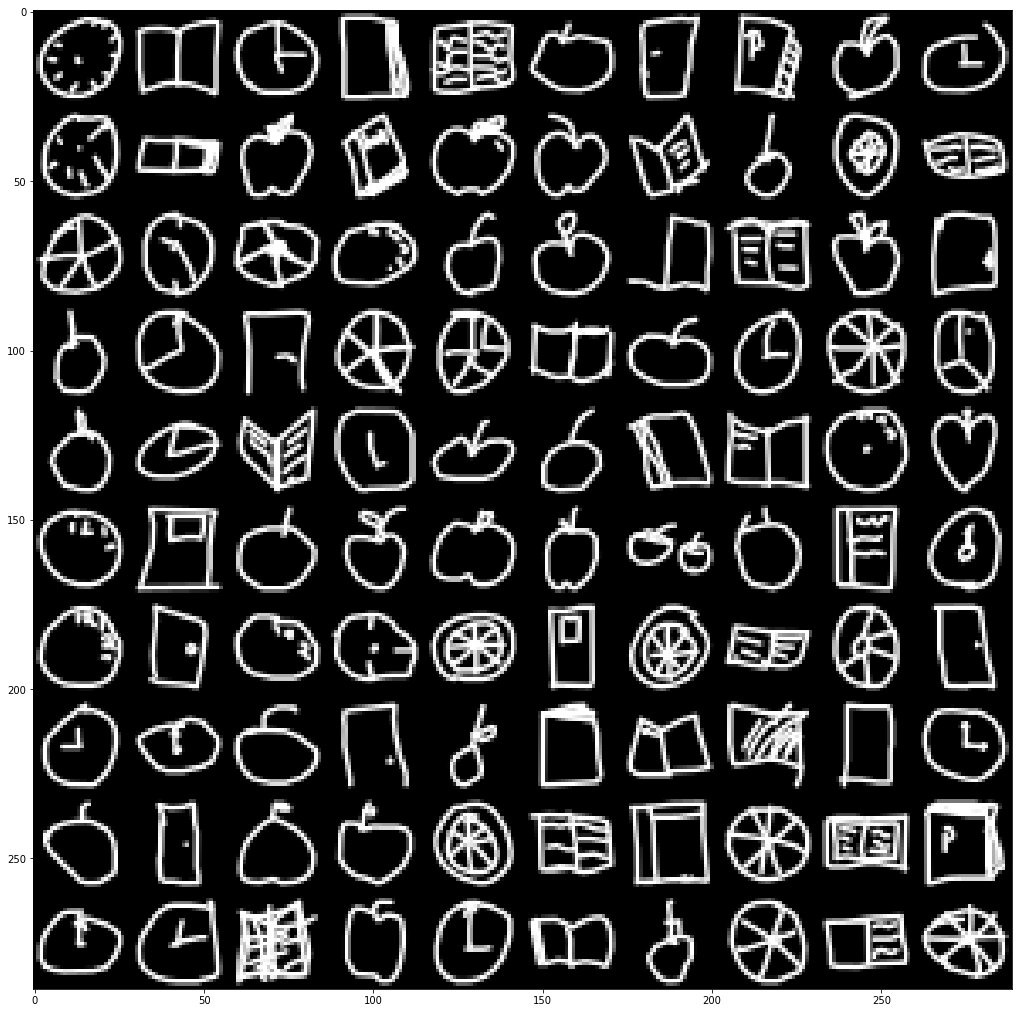

In [14]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
print(imgplot.set_cmap('gray'))
# print(doodle)
temp = [k for d in doodle[400000:400100] for k,v in doodle_dict.items() if d == v]
c = 0
for i in temp:
    c += 1
    if c % 10 == 0:
        print(i)
    else:
        print(i, end=' ')

In [0]:
sess = tf.InteractiveSession()

In [0]:
width = 28
height = 28
flat = width * height
class_output = 5
# true_dataset = np.array(true_list, dtype=np.float64)

In [0]:
x = tf.placeholder(tf.float64, shape=[None, flat])
_y = tf.placeholder(tf.float64, shape=[None, class_output])

In [57]:
x_image = tf.reshape(x, [-1, 28, 28, 1])
x_image

<tf.Tensor 'Reshape_2:0' shape=(?, 28, 28, 1) dtype=float64>

In [58]:
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1, dtype=tf.float64))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32], dtype=tf.float64))
W_conv1.shape, b_conv1.shape

(TensorShape([Dimension(5), Dimension(5), Dimension(1), Dimension(32)]),
 TensorShape([Dimension(32)]))

In [0]:
convolve1 = tf.nn.conv2d(x_image, W_conv1, strides=[1, 1, 1, 1], padding='SAME') + b_conv1

In [0]:
h_conv1 = tf.nn.relu(convolve1)

In [0]:
conv1 = tf.nn.max_pool(h_conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [0]:
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev=0.1, dtype=tf.float64))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64], dtype=tf.float64))

In [0]:
convolve2 = tf.nn.conv2d(conv1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2

In [0]:
h_conv2 = tf.nn.relu(convolve2)

In [0]:
conv2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [0]:
layer2_matrix = tf.reshape(conv2, [-1, 7 * 7 * 64])

In [0]:
W_fcl = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev=0.1, dtype=tf.float64))
b_fcl = tf.Variable(tf.constant(0.1, shape=[1024], dtype=tf.float64))

In [0]:
fcl = tf.matmul(layer2_matrix, W_fcl) + b_fcl

In [0]:
h_fcl = tf.nn.relu(fcl)

In [0]:
keep_prob = tf.placeholder(tf.float64)
layer_drop = tf.nn.dropout(h_fcl, keep_prob)

In [0]:
W_fc2 = tf.Variable(tf.truncated_normal([1024,5], stddev=0.1, dtype=tf.float64))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[5], dtype=tf.float64))

In [0]:
fc = tf.matmul(layer_drop, W_fc2) + b_fc2

In [73]:
y_CNN = tf.nn.softmax(fc)
y_CNN

<tf.Tensor 'Softmax_1:0' shape=(?, 5) dtype=float64>

In [74]:
y_CNN.shape, _y.shape

(TensorShape([Dimension(None), Dimension(5)]),
 TensorShape([Dimension(None), Dimension(5)]))

In [75]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(_y*tf.log(tf.maximum(y_CNN, 1e-300)), reduction_indices=[1]))
cross_entropy

<tf.Tensor 'Mean_2:0' shape=() dtype=float64>

In [0]:
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [0]:
correct_prediction = tf.equal(tf.argmax(y_CNN, 1), tf.argmax(_y, 1))

In [0]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float64))

In [0]:
tf.global_variables_initializer().run()

In [0]:
true_y = np.zeros((len(doodle), 5), np.int64)
r = 0
for d in doodle:
    true_y[r][d] = 1
    r += 1

In [81]:
true_y[:10]

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]])

In [0]:
train_images = list(true_list[:492188])
test_images = list(true_list[492189:])
train_y = list(true_y[:492188])
test_y = list(true_y[492189:])

In [83]:
x.shape, _y.shape

(TensorShape([Dimension(None), Dimension(784)]),
 TensorShape([Dimension(None), Dimension(5)]))

In [84]:
for i in range(9844):
    batchx = np.array(train_images[i * 50:(i + 1) * 50], dtype=np.float64) 
    batchy = np.array(train_y[i*50:(i + 1)*50], dtype=np.float64) 
    if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x:batchx, _y:batchy, keep_prob:1.0})
        print("step %d: training accuracy: %g" % (i, float(train_accuracy)))
    train_step.run(feed_dict={x:batchx, _y:batchy, keep_prob: 0.5})

step 0: training accuracy: 0.14
step 100: training accuracy: 0.86
step 200: training accuracy: 0.92
step 300: training accuracy: 0.92
step 400: training accuracy: 0.9
step 500: training accuracy: 0.92
step 600: training accuracy: 0.98
step 700: training accuracy: 0.88
step 800: training accuracy: 0.9
step 900: training accuracy: 0.9
step 1000: training accuracy: 0.98
step 1100: training accuracy: 0.98
step 1200: training accuracy: 0.98
step 1300: training accuracy: 1
step 1400: training accuracy: 1
step 1500: training accuracy: 1
step 1600: training accuracy: 0.94
step 1700: training accuracy: 0.98
step 1800: training accuracy: 0.98
step 1900: training accuracy: 0.94
step 2000: training accuracy: 0.96
step 2100: training accuracy: 0.9
step 2200: training accuracy: 0.94
step 2300: training accuracy: 1
step 2400: training accuracy: 0.98
step 2500: training accuracy: 0.96
step 2600: training accuracy: 0.98
step 2700: training accuracy: 0.96
step 2800: training accuracy: 0.98
step 2900: tr

In [85]:
n_batches = (len(test_images) // 50) + 1
cummulative_accuracy = 0.0
for index in range(n_batches):
    testbatchx = np.array(test_images[index * 50:(index + 1) * 50], dtype=np.float64)
    testbatchy = np.array(test_y[index * 50:(index + 1) * 50], dtype=np.float64)
    cummulative_accuracy += accuracy.eval(feed_dict={x:testbatchx, _y:testbatchy, keep_prob:1.0})
print("test accuracy: {}".format(cummulative_accuracy / n_batches))

test accuracy: 0.94722989439483


apple book apple apple door apple door wheel clock apple
wheel book book wheel door apple apple door apple door
door door door door apple apple book book wheel clock
book door book wheel clock door wheel wheel door apple
wheel clock clock wheel book wheel apple book book door


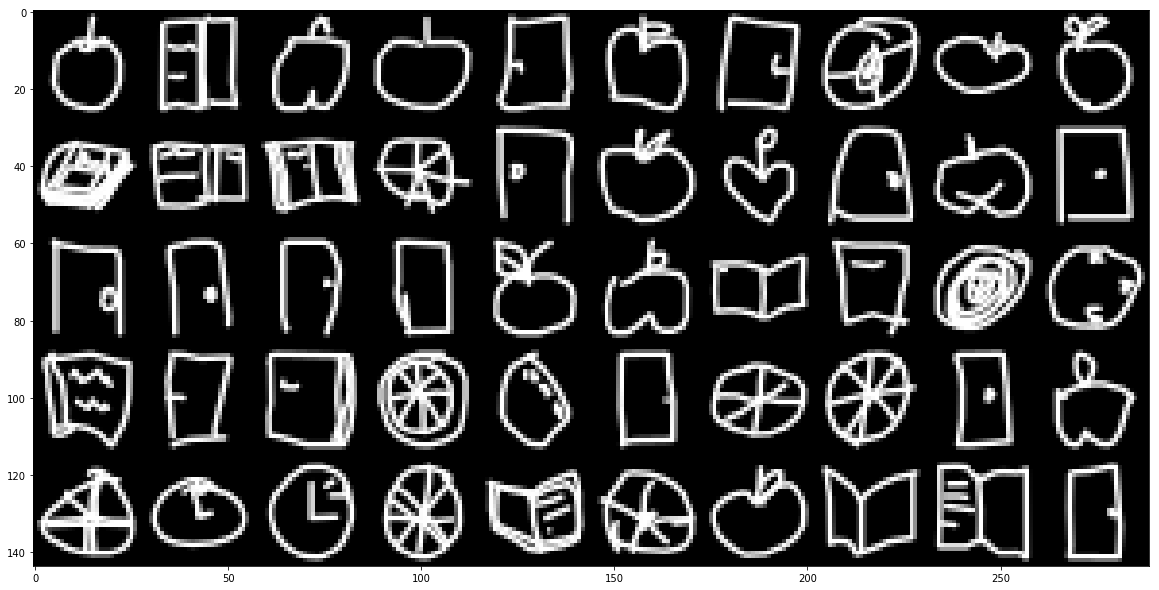

In [86]:
tempx = test_images[:50]
truey = test_y[:50]
tempy = sess.run(y_CNN, feed_dict={x:tempx, _y:truey, keep_prob:1.0})
prediction = np.argmax(tempy, axis=1)
true = np.argmax(test_y[:50], axis=1)
temp_pre = [k for d in prediction for k,v in doodle_dict.items() if d == v]
temp_tru = [k for d in true for k,v in doodle_dict.items() if d == v]
c = 0
for i in temp_pre:
    c += 1
    if c % 10 == 0:
        print(i)
    else:
        print(i, end=' ')
        
testpics = np.array(test_images[:50], dtype=np.float64)
image = Image.fromarray(tile_raster_images(testpics, img_shape=(28, 28) ,tile_shape=(5, 10), tile_spacing=(1, 1)))
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 20.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

In [0]:
sess.close()